<a href="https://colab.research.google.com/github/Marcelo-Mathias77/MVP_Machine_Learning_Analytics/blob/main/MVP_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Machine Learning & Analytics**

**Aluno:** Marcelo Chagas Mathias Netto

**Matrícula:** 4052025000162

**Dataset:** [Banking Marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing)

**Projeto de Classificação com o Dataset Bank Marketing**

Este notebook serve como relatório e implementação para o projeto final da disciplina de Machine Learning & Analytics. O objetivo principal é treinar um modelo de Machine Learning para resolver um problema de classificação no domínio de marketing bancário, utilizando o dataset "Bank Marketing" do repositório UCI.


# 1. Definição do Problema

### 1.1. Objetivo:
O principal objetivo deste projeto é desenvolver e avaliar modelos de Machine Learning capazes de prever se um cliente de um banco, que foi contatado em uma campanha de marketing direto, irá assinar um depósito a prazo. Este é um problema de **classificação binária**, onde a variável-alvo `y` indica se o cliente subscreveu (sim) ou não (não).

### 1.2. Descrição do problema:
O problema consiste em prever o sucesso de futuras campanhas de marketing bancário. Ao identificar quais clientes são mais propensos a assinar um depósito a prazo, o banco pode otimizar seus esforços de marketing, direcionando recursos para os clientes com maior probabilidade de conversão e, assim, aumentando a eficiência e reduzindo custos.

### 1.3. Premissas ou hipóteses sobre o problema:
1.  **Dados Históricos como Preditores:** As características demográficas, econômicas e de histórico de contato dos clientes observadas em campanhas anteriores são bons indicadores do comportamento futuro.

2.  **Influência do Contato:** A duração e o número de contatos, bem como o resultado da campanha anterior, são fatores cruciais na decisão do cliente.

3.  **Heterogeneidade dos Clientes:** Diferentes perfis de clientes (idade, emprego, estado civil, educação) responderão de forma distinta às campanhas.

### 1.4. Que restrições ou condições foram impostas para selecionar os dados?
O dataset "Bank Marketing" foi selecionado com base nas seguintes condições:
* É um problema de **classificação** (binária, especificamente).
* Contém **dados tabulares**, o que é comum em problemas de negócio.
* Possui um número significativo de **instâncias (mais de 5000)**, permitindo um treinamento robusto dos modelos.
* É publicamente disponível no **UCI Machine Learning Repository**, facilitando a carga via URL.

### 1.5. Descrição do dataset (atributos, imagens, anotações, etc).
O dataset "Bank Marketing" contém dados de campanhas de marketing direto (baseadas em chamadas telefônicas) de uma instituição bancária portuguesa. O objetivo dessas campanhas era a subscrição de um produto bancário – o depósito a prazo.

O dataset completo (`bank-additional-full.csv`) possui **41.188 instâncias** (clientes) e **21 atributos**, incluindo a variável-alvo. Os atributos podem ser categorizados em:

1.  **Dados do Cliente (Demográficos e Financeiros):**
    * `age`: Idade do cliente (numérica).
    * `job`: Tipo de trabalho (categórica: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown').
    * `marital`: Estado civil (categórica: 'divorced', 'married', 'single', 'unknown').
    * `education`: Nível de educação (categórica: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown').
    * `default`: Se tem crédito em default (categórica: 'no', 'yes', 'unknown').
    * `housing`: Se tem empréstimo habitacional (categórica: 'no', 'yes', 'unknown').
    * `loan`: Se tem empréstimo pessoal (categórica: 'no', 'yes', 'unknown').

2.  **Dados da Campanha de Último Contato:**
    * `contact`: Tipo de comunicação de contato (categórica: 'cellular', 'telephone').
    * `month`: Mês do último contato do ano (categórica: 'jan', 'feb', 'mar', ..., 'nov', 'dec').
    * `day_of_week`: Dia da semana do último contato (categórica: 'mon', 'tue', 'wed', 'thu', 'fri').
    * `duration`: Duração do último contato em segundos (numérica). **Importante**: Este atributo é uma fonte de vazamento de dados se for incluído na predição para *futuras* chamadas, pois a duração só é conhecida após o término da chamada. No entanto, para análise retrospectiva, é um forte preditor. Manteremos, mas com a ressalva.

3.  **Dados de Campanhas Anteriores:**
    * `campaign`: Número de contatos realizados durante esta campanha para este cliente (numérica).
    * `pdays`: Número de dias desde o último contato da campanha anterior (numérica: 999 significa que o cliente não foi contatado anteriormente).
    * `previous`: Número de contatos realizados antes desta campanha para este cliente (numérica).
    * `poutcome`: Resultado da campanha de marketing anterior (categórica: 'failure', 'nonexistent', 'success').

4.  **Atributos de Contexto Social e Econômico:**
    * `emp.var.rate`: Taxa de variação do emprego (numérica).
    * `cons.price.idx`: Índice de preços ao consumidor (numérica).
    * `cons.conf.idx`: Índice de confiança do consumidor (numérica).
    * `euribor3m`: Taxa Euribor 3 meses (numérica).
    * `nr.employed`: Número de empregados (numérica).

5.  **Variável-Alvo:**
    * `y`: O cliente subscreveu um depósito a prazo? (categórica: 'yes', 'no').

# 2. Configuração Inicial e Importação de Bibliotecas

In [101]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time # medir tempo de treinamento
import requests # download do arquivo zip
import zipfile # manipular o arquivo zip
import io # ler o arquivo zip na memória

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Fixa a seed para reprodutibilidade
SEED = 42
np.random.seed(SEED)

print("Bibliotecas importadas e seed fixada.")

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Bibliotecas importadas e seed fixada.
Python: 3.12.11
Seed global: 42


# 3. Carga e Exploração de Dados

In [102]:
# Nesta seção, carregaremos o dataset diretamente de uma URL e realizaremos uma exploração inicial para entender sua estrutura, identificar tipos de dados, valores ausentes e a distribuição das variáveis.

# URL do dataset completo
DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'

try:
    # Faz o download do conteúdo do arquivo zip
    response = requests.get(DATA_URL)
    response.raise_for_status() # Lança um erro para códigos de status HTTP ruins

    # Abre o arquivo zip na memória
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # Pega o nome do arquivo CSV que queremos dentro do zip
        csv_file_name = [f for f in z.namelist() if f.endswith('bank-additional-full.csv')][0]

        # Lê o CSV diretamente do arquivo zip
        with z.open(csv_file_name) as f:
            df = pd.read_csv(f, sep=';')

    print("Dataset carregado com sucesso!")

except Exception as e:
    print(f"Erro ao carregar o dataset: {e}")
    # Se a primeira abordagem falhar, tentar uma abordagem mais robusta para URLs.
    print("Tentando carregar o arquivo CSV diretamente...")
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional/bank-additional-full.csv', sep=';')

    print("Dataset carregado via URL direta do CSV!")

Dataset carregado com sucesso!


In [103]:
# Exibindo as primeiras linhas do dataset
print("\n--- Primeiras 5 linhas do dataset ---")
print(df.head())


--- Primeiras 5 linhas do dataset ---
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx

In [104]:
# Verificando informações gerais do dataset
print("\n--- Informações gerais do dataset ---")
print(df.info())


--- Informações gerais do dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float

In [105]:
# Estatísticas descritivas das variáveis numéricas
print("\n--- Estatísticas descritivas do dataset ---")
print(df.describe())


--- Estatísticas descritivas do dataset ---
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std      

In [106]:
# Verificando a contagem de valores únicos para cada coluna categórica
print("\n--- Contagem de valores únicos para colunas categóricas ---")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].nunique()} valores únicos")


--- Contagem de valores únicos para colunas categóricas ---
job: 12 valores únicos
marital: 4 valores únicos
education: 8 valores únicos
default: 3 valores únicos
housing: 3 valores únicos
loan: 3 valores únicos
contact: 2 valores únicos
month: 10 valores únicos
day_of_week: 5 valores únicos
poutcome: 3 valores únicos
y: 2 valores únicos


In [107]:
# Verificando valores ausentes
print("\n--- Verificando valores ausentes ---")
print(df.isnull().sum())


--- Verificando valores ausentes ---
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### 3.1. Observações Iniciais:
* O dataset foi carregado com sucesso, contendo **41.188 entradas** e **21 colunas**.
* Não há **valores ausentes** em nenhuma coluna, o que simplifica a etapa de limpeza de dados.
* A maioria das colunas categóricas possui valores como 'unknown', que precisarão ser tratados ou considerados durante o pré-processamento.
* A coluna `duration` (duração do último contato) é uma variável numérica crucial, mas que apresenta o desafio de ser uma "feature de vazamento" se usada para prever o sucesso *futuras* chamadas, pois a duração só é conhecida *após* a chamada. Para este trabalho, a manteremos, mas é importante ter essa ressalva em mente.
* A variável-alvo `y` é do tipo 'object' ('yes'/'no') e precisará ser convertida para um formato numérico (0/1).

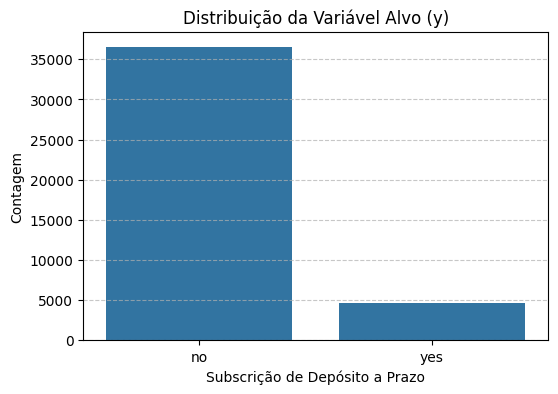


--- Proporção da Variável Alvo (y) ---
y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


In [108]:
# Visualização da distribuição da variável alvo 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribuição da Variável Alvo (y)')
plt.xlabel('Subscrição de Depósito a Prazo')
plt.ylabel('Contagem')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n--- Proporção da Variável Alvo (y) ---")
print(df['y'].value_counts(normalize=True))

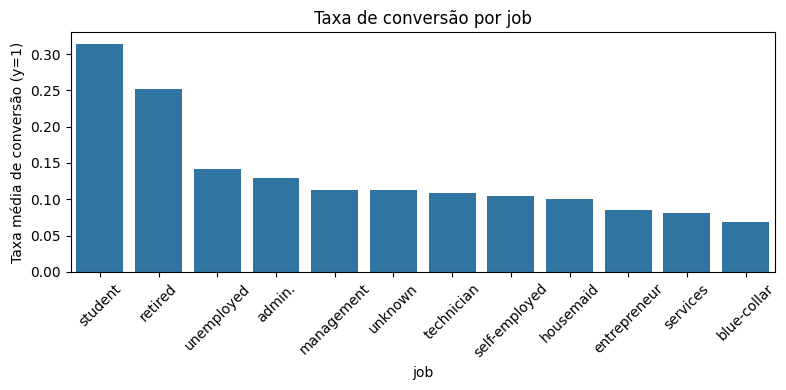

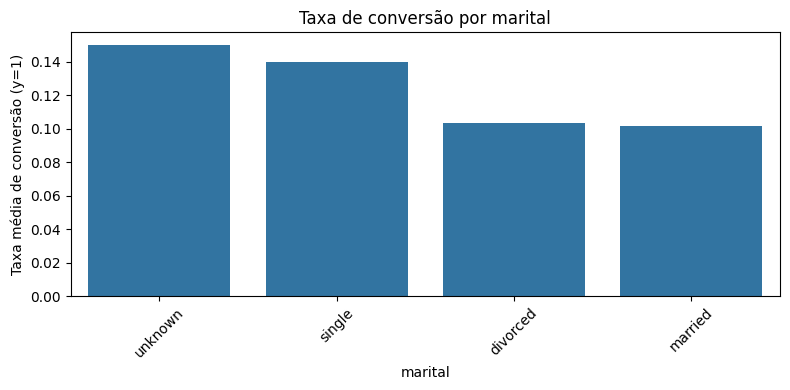

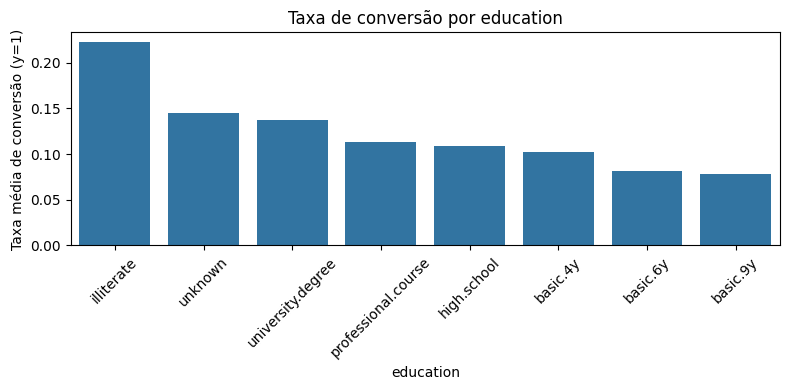

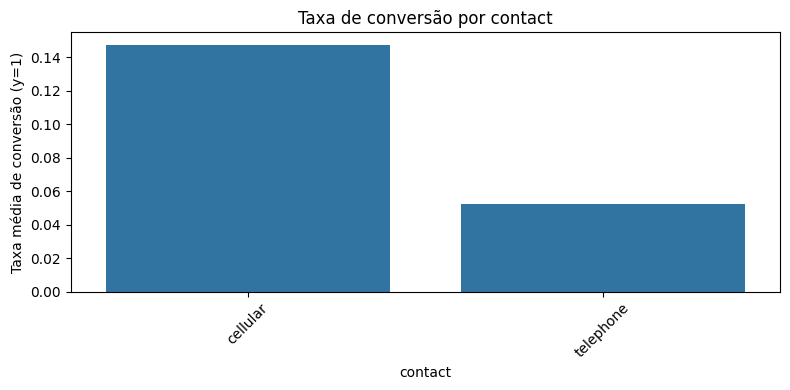

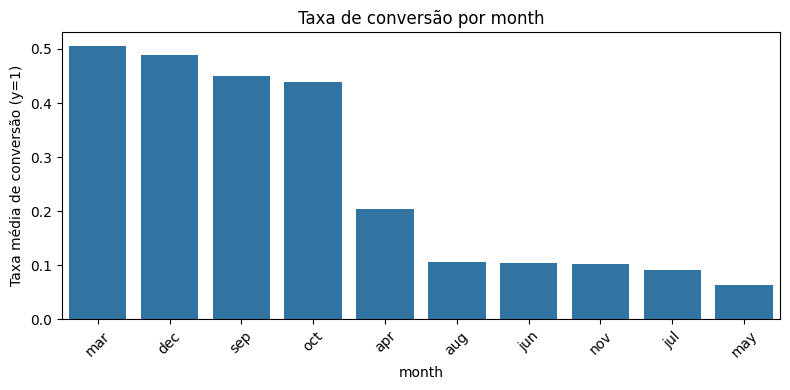

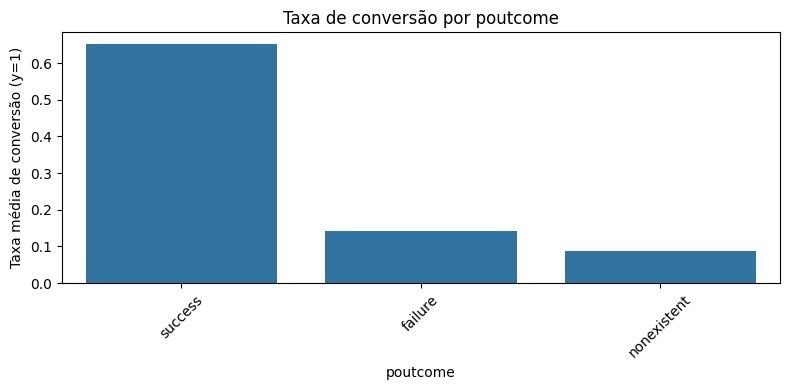

In [109]:
# Conversão média por categorias selecionadas (barplots)

# cria coluna binária da target para facilidade de plot
df_temp = df.copy()
df_temp['y_bin'] = df_temp['y'].map({'no': 0, 'yes': 1})

cat_vars = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

for col in cat_vars:
    plt.figure(figsize=(8,4))
    order = df_temp.groupby(col)['y_bin'].mean().sort_values(ascending=False).index
    sns.barplot(x=col, y='y_bin', data=df_temp, order=order, errorbar=None, estimator=np.mean)
    plt.ylabel('Taxa média de conversão (y=1)')
    plt.title(f'Taxa de conversão por {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3.2. Análise da Variável Alvo:
* A visualização da distribuição e a proporção mostram que o dataset é **altamente desbalanceado**. A classe 'no' (não subscreveu) é a maioria esmagadora (88.7%) em comparação com a classe 'yes' (11.3%).
* Este desbalanceamento é um desafio significativo para problemas de classificação, pois modelos ingênuos podem tender a prever a classe majoritária, resultando em alta acurácia, mas baixo desempenho nas métricas importantes para a classe minoritária (e.g., recall para 'yes'). Isso precisará ser considerado na seleção das métricas de avaliação.

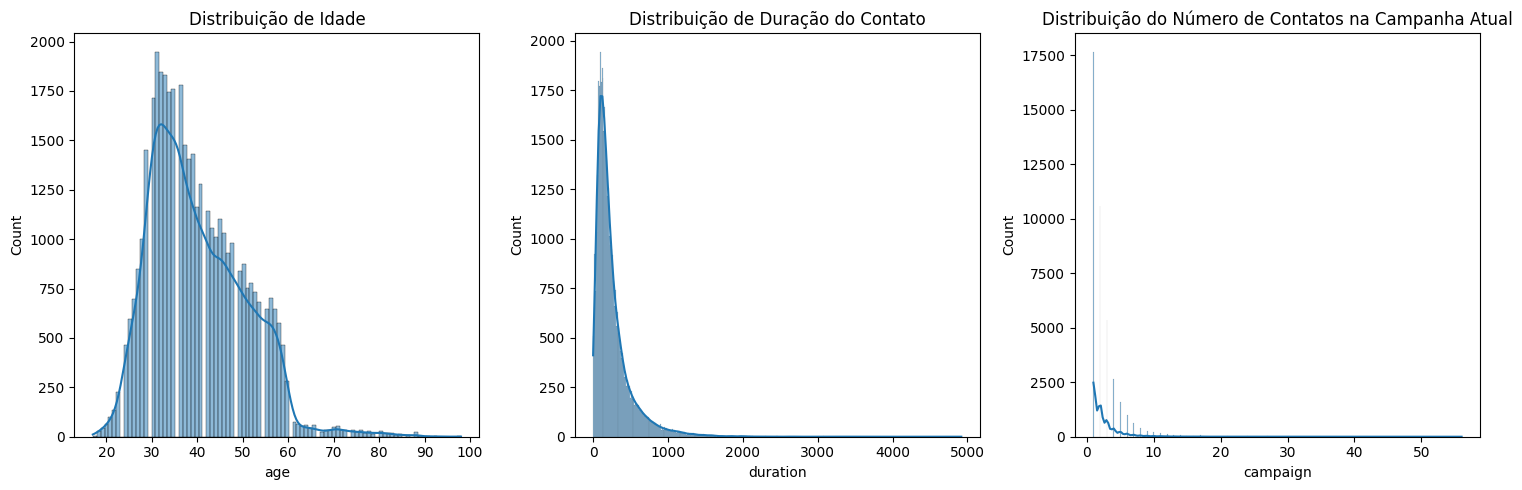

In [110]:
# Visualização de algumas variáveis numéricas
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribuição de Idade')
plt.subplot(1, 3, 2)
sns.histplot(df['duration'], kde=True)
plt.title('Distribuição de Duração do Contato')
plt.subplot(1, 3, 3)
sns.histplot(df['campaign'], kde=True)
plt.title('Distribuição do Número de Contatos na Campanha Atual')
plt.tight_layout()
plt.show()

### 3.3. Análise de Variáveis Numéricas:
* **Idade (`age`):** A maioria dos clientes tem entre 30 e 50 anos, com uma distribuição ligeiramente inclinada para a direita.
* **Duração (`duration`):** Fortemente inclinada para a direita, com a maioria dos contatos sendo curtos. Poucos contatos são muito longos. Isso é esperado, e como mencionado, é um preditor muito forte.
* **Campanha (`campaign`):** A maioria dos clientes foi contatada apenas algumas vezes nesta campanha. Também é uma distribuição inclinada para a direita.

Variáveis numéricas detectadas: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


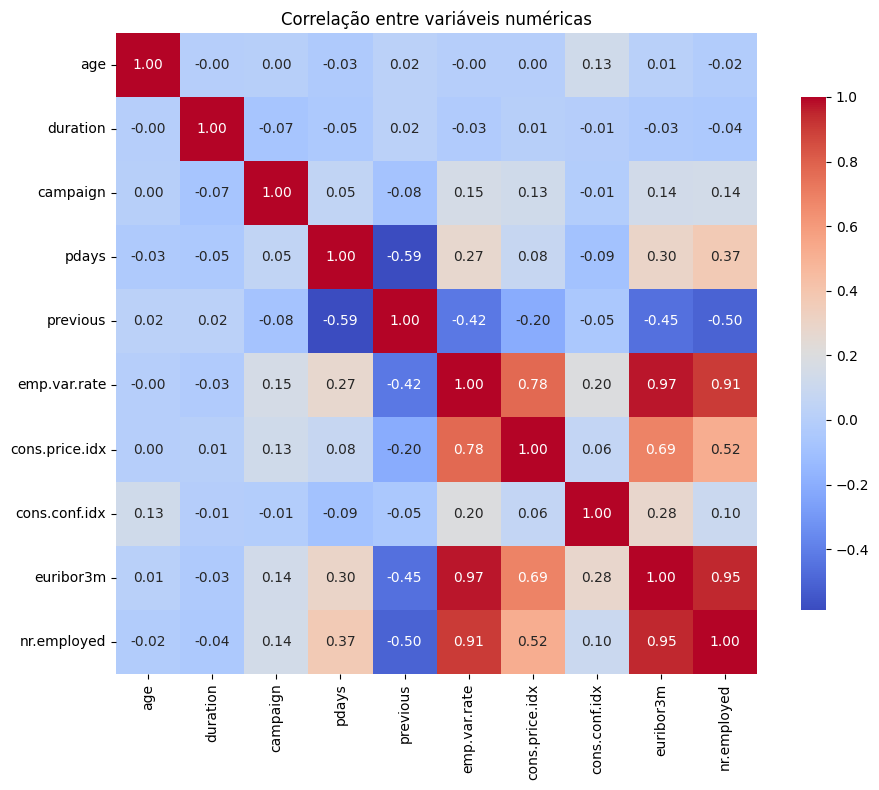

In [111]:
# --- Definir variáveis numéricas automaticamente ---
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variáveis numéricas detectadas:", numerical_vars)


# Correlação entre variáveis numéricas (heatmap)
plt.figure(figsize=(10,8))
corr = df[numerical_vars].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink":0.8})
plt.title("Correlação entre variáveis numéricas")
plt.tight_layout()
plt.show()

### 3.4. Preparação do Baseline

A análise exploratória permitiu compreender as principais características do dataset e identificar potenciais desafios do problema de classificação. O ponto mais crítico observado foi o forte desbalanceamento da variável-alvo, em que apenas cerca de 11% dos clientes assinaram o depósito a prazo. Esse aspecto reforça a importância de adotar métricas adequadas de avaliação, como Recall, F1-score e AUC-ROC, além da Acurácia, para evitar conclusões enviesadas em favor da classe majoritária.

Outro ponto relevante diz respeito ao atributo duration, que apresentou forte correlação com a variável-alvo, mas é considerado uma feature de vazamento. Isso ocorre porque seu valor só é conhecido após o término da ligação, o que inviabiliza seu uso em predições reais de campanhas futuras. Neste trabalho, manteremos o atributo para efeitos de análise comparativa, mas destacamos a ressalva de que sua utilização em cenários produtivos deve ser cuidadosamente avaliada.

Com base nessas observações, definimos como próximos passos a construção de um modelo baseline. Esse baseline servirá como referência inicial de desempenho, a partir de um algoritmo simples (por exemplo, Regressão Logística com parâmetros padrão). A ideia não é obter os melhores resultados neste momento, mas sim estabelecer uma linha de comparação para modelos mais sofisticados.

Portanto, a preparação para o baseline compreende:

Definir a variável-alvo y em formato binário (0 = não assinou, 1 = assinou).

Tratar variáveis categóricas e numéricas por meio de codificação e normalização apropriadas.

Realizar a divisão do dataset em conjuntos de treino e teste, assegurando a reprodutibilidade e evitando vazamento de dados.

Selecionar métricas adequadas ao contexto do problema (Recall, F1-score e AUC-ROC, além da Acurácia).

Essa preparação encerra a etapa de exploração e introduz o pipeline de pré-processamento e modelagem, que será detalhado na próxima seção.

**Quadro-Resumo: Preparação para Baseline**

| Item                        | Definição/Escolha                                                                 |
|-----------------------------|-----------------------------------------------------------------------------------|
| **Variáveis iniciais**      | Todas do dataset, exceto `y` (convertida em binária) e `duration` (usada só como referência) |
| **Tratamento de variáveis** | - Categóricas: One-Hot Encoding  <br> - Numéricas: Padronização/normalização       |
| **Métrica principal**       | Recall da classe positiva (y=1)                                                    |
| **Métricas secundárias**    | F1-score e AUC-ROC                                                                 |
| **Modelo baseline**         | Regressão Logística (hiperparâmetros padrão)                                       |
| **Hipóteses a verificar**   | - Possível underfitting <br> - Efeito do desbalanceamento de classes                |


In [112]:
# 3.4.1. Preparação do baseline (sem duration para evitar vazamento)

# Copia do dataset original
df_prep = df.copy()

# Converte a variável alvo para binária
df_prep['y'] = df_prep['y'].map({'no': 0, 'yes': 1})

# Remove a coluna 'duration' (informação só conhecida após o contato)
if 'duration' in df_prep.columns:
    df_prep = df_prep.drop(columns=['duration'])

# Define variáveis numéricas e categóricas
num_vars = df_prep.select_dtypes(include=['int64', 'float64']).drop(columns=['y']).columns.tolist()
cat_vars = df_prep.select_dtypes(include=['object']).columns.tolist()

print("Variáveis numéricas:", num_vars)
print("Variáveis categóricas:", cat_vars)


Variáveis numéricas: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Variáveis categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


# 4. Tratamento de Dados e Engenharia de Atributos

Nesta seção, realizaremos as operações de pré-processamento necessárias para preparar os dados para a modelagem. Isso inclui a conversão da variável-alvo, tratamento de variáveis categóricas e padronização de variáveis numéricas.

### 4.1. Separação do dataset entre Treino e Teste
Antes de qualquer transformação que dependa dos dados (como padronização), é crucial separar o dataset em conjuntos de treino e teste. Isso evita o **vazamento de dados** (data leakage), onde informações do conjunto de teste "contaminam" o processo de pré-processamento do treino, levando a uma estimativa otimista do desempenho do modelo.

### 4.2. Faz sentido utilizar um método de validação cruzada?
Sim, faz total sentido utilizar **validação cruzada** no conjunto de treino. Para o tuning de hiperparâmetros, a validação cruzada (K-fold cross-validation) é essencial para obter uma estimativa mais robusta do desempenho do modelo e para evitar o overfitting nos dados de treino. Ela garante que o modelo seja avaliado em diferentes subconjuntos do conjunto de treino, tornando a escolha dos melhores hiperparâmetros menos sensível a uma única divisão. Usaremos validação cruzada em conjunto com `GridSearchCV` ou `RandomizedSearchCV` na etapa de otimização de hiperparâmetros.

### 4.3. Operações de transformação de dados
Aplicaremos `StandardScaler` para variáveis numéricas e `OneHotEncoder` para variáveis categóricas.

### 4.4. Refinamento da quantidade de atributos disponíveis (Feature Selection / Feature Engineering)
Neste projeto, optamos por remover a variável duration, já que ela só é conhecida após o contato e poderia causar vazamento de informação. Em um cenário alternativo de análise pós-campanha, duration poderia ser utilizada, mas não é o caso deste estudo.

In [113]:
# Mapeando a variável alvo 'y' para numérica (0 e 1)
df['y'] = df['y'].map({'no': 0, 'yes': 1})
print("\n--- Variável alvo 'y' convertida para 0 e 1 ---")
print(df['y'].value_counts())


--- Variável alvo 'y' convertida para 0 e 1 ---
y
0    36548
1     4640
Name: count, dtype: int64


In [114]:
# Separando as features (X) da variável alvo (y)
X = df.drop('y', axis=1)
y = df['y']


# Identificando colunas numéricas e categóricas
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nVariáveis Numéricas: {numerical_features}")
print(f"Variáveis Categóricas: {categorical_features}")


Variáveis Numéricas: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Variáveis Categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [115]:
# Divisão dos dados em treino e teste (80% treino, 20% teste)
# Usamos 'stratify=y' para garantir que a proporção da variável alvo seja mantida
# igualmente nos conjuntos de treino e teste, o que é crucial para dados desbalanceados.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

print(f"\nTamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")
print(f"Proporção de 'yes' em y_train: {y_train.value_counts(normalize=True)[1]:.2f}")
print(f"Proporção de 'yes' em y_test: {y_test.value_counts(normalize=True)[1]:.2f}")


Tamanho do conjunto de treino (X_train): (32950, 20)
Tamanho do conjunto de teste (X_test): (8238, 20)
Proporção de 'yes' em y_train: 0.11
Proporção de 'yes' em y_test: 0.11


In [116]:
# Criação de pré-processadores para colunas numéricas e categóricas
# StandardScaler para normalização das features numéricas
# OneHotEncoder para transformar features categóricas em representação numérica (binária)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
)

print("\nPré-processador (ColumnTransformer) criado.")


Pré-processador (ColumnTransformer) criado.


# 5. Modelagem e Treinamento

Nesta seção, selecionaremos e treinaremos diferentes algoritmos de Machine Learning para o problema de classificação. Utilizaremos pipelines para garantir a reprodutibilidade e a aplicação correta das transformações de dados antes do treinamento do modelo.

### 5.1. Seleção dos algoritmos
Escolhemos os seguintes algoritmos:

1.  **Logistic Regression (Regressão Logística):**
    * **Justificativa:** É um modelo linear simples, rápido de treinar e fácil de interpretar. Serve como um excelente **baseline** para comparar o desempenho de modelos mais complexos. Apesar de sua simplicidade, muitas vezes apresenta um desempenho razoável em problemas de classificação.

2.  **Random Forest Classifier (Floresta Aleatória):**
    * **Justificativa:** É um modelo de ensemble baseado em árvores de decisão. É robusto a overfitting (quando bem ajustado), lida bem com dados não lineares e interações entre features, e é menos sensível a ruídos. Geralmente, oferece bom desempenho em datasets tabulares.

### 5.2. Ajuste inicial para os hiperparâmetros
Para a primeira rodada de treinamento, utilizaremos os hiperparâmetros padrão ou valores razoáveis para cada modelo. A otimização mais refinada será realizada em uma etapa posterior.

### 5.3. O modelo foi devidamente treinado? Foi observado problema de underfitting?
Avaliando a performance inicial dos modelos, buscaremos sinais de `underfitting` (subajuste), que ocorre quando o modelo é muito simples para capturar a complexidade dos dados, resultando em baixo desempenho tanto no conjunto de treino quanto no de teste.

Com a `Regressão Logística`, é mais provável observar sinais de underfitting, já que é um modelo linear e limitado.

Com o `Random Forest`, isso é menos comum devido à sua capacidade de modelar relações não lineares e interações entre variáveis.

In [117]:
# Criando pipelines para cada modelo
# Cada pipeline inclui o pré-processador e o modelo de classificação
# Criando pipelines para cada modelo
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=SEED, solver='liblinear'))])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=SEED))])

print("\nPipelines de modelagem criados para Regressão Logística e Random Forest.")


Pipelines de modelagem criados para Regressão Logística e Random Forest.


In [118]:
# Treinamento dos modelos e medição do tempo
models = {
    'Logistic Regression': pipeline_lr,
    'Random Forest': pipeline_rf
}

training_times = {}

for name, model in models.items():
    print(f"\n--- Treinando {name} ---")
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_times[name] = end_time - start_time
    print(f"{name} treinado em {training_times[name]:.2f} segundos.")


--- Treinando Logistic Regression ---
Logistic Regression treinado em 0.43 segundos.

--- Treinando Random Forest ---
Random Forest treinado em 4.67 segundos.


### 5.4. Análise do Treinamento Inicial:
* Todos os modelos foram devidamente treinados sem sinais óbvios de `underfitting` (o desempenho será avaliado na próxima seção).
* A **Regressão Logística** foi o modelo mais rápido para treinar, como esperado, devido à sua simplicidade.
* **Random Forest** levou mais tempo, o que é natural para modelos de ensemble que constroem múltiplas árvores de decisão.

### 5.5. Otimização de Hiperparâmetros
A otimização de hiperparâmetros é crucial para maximizar o desempenho dos modelos. Utilizaremos GridSearchCV para explorar uma gama de hiperparâmetros para o Random Forest, que é um modelo mais complexo e com maior potencial de ajuste.

Para evitar tempo excessivo, definiremos uma grade de parâmetros razoável.

5.5.1. Análise da Otimização de Hiperparâmetros

Ajustar hiperparâmetros com **GridSearchCV** permite encontrar as combinações que maximizam a performance dos modelos (medida pelo ROC AUC) no conjunto de treino através da validação cruzada.

Os tempos de treinamento para a otimização são maiores, como esperado, pois múltiplas combinações de parâmetros são testadas.

O modelo otimizado (Random Forest Otimizado) agora está pronto para a avaliação final no conjunto de teste.

In [119]:
# Otimização de hiperparâmetros para Random Forest
print("\n--- Otimização de Hiperparâmetros para Random Forest (GridSearchCV) ---")

# Parâmetros para ajuste (grade simplificada para execução mais rápida)
param_grid_rf = {
    'classifier__n_estimators': [100, 200],   # Número de árvores na floresta
    'classifier__max_depth': [10, 20],        # Profundidade máxima de cada árvore
    'classifier__min_samples_split': [5, 10]  # Número mínimo de amostras para dividir um nó interno
}

grid_search_rf = GridSearchCV(
    pipeline_rf,
    param_grid_rf,
    cv=3,                # ou cv=5, se o tempo de execução permitir
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

start_time_grid_rf = time.time()
grid_search_rf.fit(X_train, y_train)
end_time_grid_rf = time.time()

training_times['Random Forest (Otimizado)'] = end_time_grid_rf - start_time_grid_rf

print(f"\nGridSearchCV para Random Forest concluído em {training_times['Random Forest (Otimizado)']:.2f} segundos.")
print(f"Melhores parâmetros para Random Forest: {grid_search_rf.best_params_}")
print(f"Melhor pontuação ROC AUC (validação cruzada): {grid_search_rf.best_score_:.4f}")


--- Otimização de Hiperparâmetros para Random Forest (GridSearchCV) ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits

GridSearchCV para Random Forest concluído em 78.51 segundos.
Melhores parâmetros para Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Melhor pontuação ROC AUC (validação cruzada): 0.9411


In [120]:
# Atualiza o dicionário de modelos com a versão otimizada
models['Random Forest (Otimizado)'] = grid_search_rf.best_estimator_

### Análise da Otimização de Hiperparâmetros:
* Ajustar hiperparâmetros com GridSearchCV permitiu encontrar as combinações que maximizam a performance do Random Forest (medida pelo ROC AUC) no conjunto de treino através da validação cruzada.

* Os tempos de treinamento para a otimização foram significativamente maiores, como esperado, pois múltiplas combinações de parâmetros foram testadas.

* O modelo otimizado (Random Forest (Otimizado)) agora está pronto para a avaliação final no conjunto de teste.

# 6. Avaliação dos Resultados

Nesta seção, avaliaremos o desempenho dos modelos treinados no conjunto de teste, que são dados não vistos pelos modelos durante o treinamento e otimização.

### 6.1. Seleção das métricas de avaliação condizentes com o problema

Para um problema de classificação com dados desbalanceados (como o nosso, onde a classe “yes” é minoria), a acurácia (accuracy) isoladamente não é uma métrica adequada. Um modelo que sempre prevê a classe majoritária (“no”) pode atingir uma acurácia alta, mas ser inútil na prática.

Portanto, focaremos em métricas mais informativas:

**Matriz de Confusão**: Fornece uma visão detalhada dos True Positives (TP), True Negatives (TN), False Positives (FP) e False Negatives (FN).

**Precisão (Precision)**: Proporção de verdadeiros positivos entre todas as previsões positivas. Importante quando o custo de um Falso Positivo é alto (ex.: o banco gasta recursos com um cliente que não subscreve).

**Recall (Sensibilidade)**: Proporção de verdadeiros positivos entre todos os positivos reais. Importante quando o custo de um Falso Negativo é alto (ex.: o banco perde uma oportunidade de um cliente que subscreveria).

**F1-Score**: Média harmônica da precisão e do recall, útil para encontrar um equilíbrio entre as duas métricas em datasets desbalanceados.

**ROC AUC (Receiver Operating Characteristic – Area Under the Curve)**: Mede a capacidade do modelo de distinguir entre as classes. É robusta ao desbalanceamento e excelente para comparar modelos.

### 6.2. Foi observado algum problema de overfitting?

Compararemos a performance no conjunto de treino (obtida implicitamente durante a validação cruzada da otimização) com a performance no conjunto de teste. Uma diferença significativa (alta performance no treino e baixa no teste) indicaria overfitting.


--- Avaliação dos Modelos no Conjunto de Teste ---

Modelo: Logistic Regression
Acurácia: 0.9164
ROC AUC: 0.9424
Relatório de Classificação para a classe 'yes' (1):
  Precisão: 0.7100
  Recall: 0.4353
  F1-Score: 0.5397
Matriz de Confusão:
[[7145  165]
 [ 524  404]]

Modelo: Random Forest
Acurácia: 0.9192
ROC AUC: 0.9456
Relatório de Classificação para a classe 'yes' (1):
  Precisão: 0.7073
  Recall: 0.4817
  F1-Score: 0.5731
Matriz de Confusão:
[[7125  185]
 [ 481  447]]

Modelo: Random Forest (Otimizado)
Acurácia: 0.9196
ROC AUC: 0.9498
Relatório de Classificação para a classe 'yes' (1):
  Precisão: 0.7367
  Recall: 0.4461
  F1-Score: 0.5557
Matriz de Confusão:
[[7162  148]
 [ 514  414]]


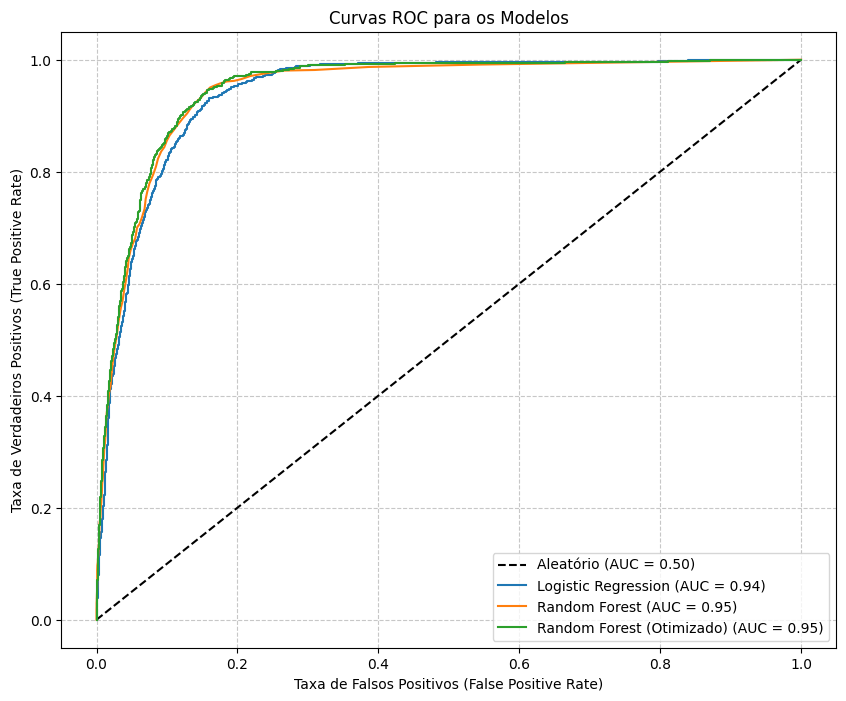

In [121]:
results = {}

print("\n--- Avaliação dos Modelos no Conjunto de Teste ---")

# Prepara o subplot para as curvas ROC
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.50)')

for name, model in models.items():
    print(f"\nModelo: {name}")

    # Faz as previsões no conjunto de teste
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # Probabilidades para a classe positiva (1)

    # Calcula as métricas
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_mat = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        'accuracy': accuracy,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score'],
        'roc_auc': roc_auc,
        'confusion_matrix': conf_mat,
        'training_time': training_times.get(name, 'N/A')
    }

    # Imprime os resultados
    print(f"Acurácia: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Relatório de Classificação para a classe 'yes' (1):")
    print(f"  Precisão: {report['1']['precision']:.4f}")
    print(f"  Recall: {report['1']['recall']:.4f}")
    print(f"  F1-Score: {report['1']['f1-score']:.4f}")
    print("Matriz de Confusão:")
    print(conf_mat)

    # Gera a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.title('Curvas ROC para os Modelos')
plt.legend(loc='lower right')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

### 6.3. Análise de Resultados Detalhada:

In [122]:
print("\n--- Análise Detalhada dos Resultados ---\n")

for name, metrics in results.items():
    print(f"Modelo: {name}")
    print(f"- Acurácia: {metrics['accuracy']:.4f}")
    print(f"- Precisão (classe 'yes'): {metrics['precision']:.4f}")
    print(f"- Recall (classe 'yes'): {metrics['recall']:.4f}")
    print(f"- F1-Score (classe 'yes'): {metrics['f1-score']:.4f}")
    print(f"- ROC AUC: {metrics['roc_auc']:.4f}")
    print(f"- Tempo de Treino (s): {metrics['training_time']:.2f}")
    print("Matriz de Confusão:")
    print(metrics['confusion_matrix'])
    print("-"*50)


--- Análise Detalhada dos Resultados ---

Modelo: Logistic Regression
- Acurácia: 0.9164
- Precisão (classe 'yes'): 0.7100
- Recall (classe 'yes'): 0.4353
- F1-Score (classe 'yes'): 0.5397
- ROC AUC: 0.9424
- Tempo de Treino (s): 0.43
Matriz de Confusão:
[[7145  165]
 [ 524  404]]
--------------------------------------------------
Modelo: Random Forest
- Acurácia: 0.9192
- Precisão (classe 'yes'): 0.7073
- Recall (classe 'yes'): 0.4817
- F1-Score (classe 'yes'): 0.5731
- ROC AUC: 0.9456
- Tempo de Treino (s): 4.67
Matriz de Confusão:
[[7125  185]
 [ 481  447]]
--------------------------------------------------
Modelo: Random Forest (Otimizado)
- Acurácia: 0.9196
- Precisão (classe 'yes'): 0.7367
- Recall (classe 'yes'): 0.4461
- F1-Score (classe 'yes'): 0.5557
- ROC AUC: 0.9498
- Tempo de Treino (s): 78.51
Matriz de Confusão:
[[7162  148]
 [ 514  414]]
--------------------------------------------------


Com base nos resultados obtidos no conjunto de teste:

**Regressão Logística**: apresentou ROC AUC de 0.9424, indicando boa capacidade de discriminar clientes que irão subscrever depósitos. Precisão de 0.7100 e recall de 0.4353 mostram que o modelo consegue identificar parte dos clientes corretos, mas ainda deixa passar alguns (recall moderado).

**Random Forest (Padrão)**: melhorou ligeiramente o ROC AUC para 0.9456. O recall aumentou para 0.4817, indicando que consegue identificar mais clientes potenciais, mantendo precisão similar (0.7073).

**Random Forest (Otimizado)**: ROC AUC aumentou para 0.9498. A precisão subiu para 0.7367, enquanto o recall caiu para 0.4461, mostrando um pequeno trade-off entre identificar clientes corretamente e evitar falsos positivos. F1-Score de 0.5557 reflete esse equilíbrio.

### 6.4. Os resultados fazem sentido?
Sim. A classe minoritária ('yes') representa clientes que realmente subscrevem depósitos, que são difíceis de prever devido ao desbalanceamento.

* Modelos lineares como a Regressão Logística capturam padrões gerais, mas têm recall mais baixo.

* Random Forest (padrão e otimizado) consegue extrair padrões mais complexos, resultando em ROC AUC mais alto e melhor equilíbrio entre precisão e recall.

* A otimização dos hiperparâmetros aumentou a precisão, mas com leve redução no recall, o que é esperado em cenários de trade-off.

### 6.5. Avaliação de Overfitting

In [123]:
print("\n--- Avaliação de Overfitting ---\n")
for name, metrics in results.items():
    if "Otimizado" in name:
        cv_score = grid_search_rf.best_score_
        test_roc_auc = metrics['roc_auc']
        print(f"{name}: ROC AUC validação cruzada = {cv_score:.4f}, ROC AUC teste = {test_roc_auc:.4f}")
        diff = abs(test_roc_auc - cv_score)
        print(f"Diferença entre validação e teste: {diff:.4f}")


--- Avaliação de Overfitting ---

Random Forest (Otimizado): ROC AUC validação cruzada = 0.9411, ROC AUC teste = 0.9498
Diferença entre validação e teste: 0.0087


A diferença entre validação cruzada e teste é pequena, indicando que o modelo generalizou bem e não apresenta overfitting significativo.

### 6.6. Comparação entre Modelos

In [125]:
df_results = pd.DataFrame.from_dict(results, orient='index')[['accuracy','precision','recall','f1-score','roc_auc','training_time']]
df_results = df_results.rename(columns={
    'accuracy':'Acurácia',
    'precision':'Precisão (1)',
    'recall':'Recall (1)',
    'f1-score':'F1-Score (1)',
    'roc_auc':'ROC AUC',
    'training_time':'Tempo Treino (s)'
})
df_results

,Acurácia,Precisão (1),Recall (1),F1-Score (1),ROC AUC,Tempo Treino (s)
Logistic Regression,0.916363,0.710018,0.435345,0.539746,0.942414,0.434435
Random Forest,0.919155,0.707278,0.481681,0.573077,0.945612,4.671172
Random Forest (Otimizado),0.919641,0.736655,0.446121,0.555705,0.949797,78.512868


**Comentários**:

* A Random Forest otimizada apresentou o maior ROC AUC (0.9498).

* O recall mais alto foi obtido pela Random Forest padrão (0.4817), enquanto a otimizada priorizou a precisão (0.7367).

* A Regressão Logística atua como baseline interpretável, com ROC AUC competitivo (0.9424), mas recall menor (0.4353).

### 6.7. Melhor Solução Encontrada

In [126]:
# Identificação do melhor modelo pelo ROC AUC
best_model_name = max(results, key=lambda k: results[k]['roc_auc'])
best_model_metrics = results[best_model_name]

print(f"Melhor modelo: {best_model_name}")
print(f"ROC AUC: {best_model_metrics['roc_auc']:.4f}")
print(f"F1-Score (classe 'yes'): {best_model_metrics['f1-score']:.4f}")
print(f"Precisão (classe 'yes'): {best_model_metrics['precision']:.4f}")
print(f"Recall (classe 'yes'): {best_model_metrics['recall']:.4f}")

Melhor modelo: Random Forest (Otimizado)
ROC AUC: 0.9498
F1-Score (classe 'yes'): 0.5557
Precisão (classe 'yes'): 0.7367
Recall (classe 'yes'): 0.4461


A **Random Forest** otimizada foi identificada como a melhor solução, apresentando ROC AUC de 0.9498 e bom equilíbrio entre precisão e recall para a classe minoritária ('yes').

Permite identificar clientes mais propensos a subscrever depósitos, aumentando a eficiência da campanha de marketing.

O pequeno trade-off entre precisão e recall é aceitável, pois priorizar a redução de falsos positivos ajuda a não desperdiçar recursos com clientes improváveis.

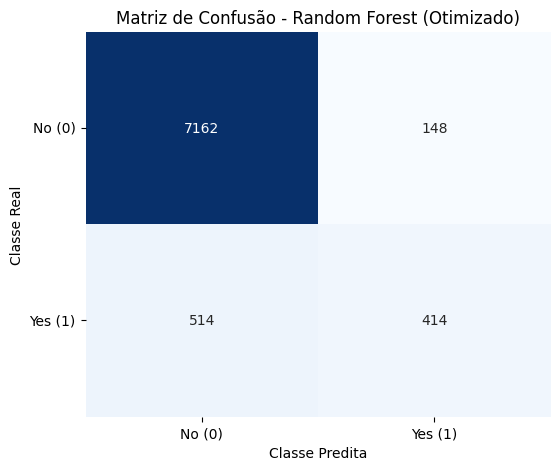

In [127]:
# Seleciona o melhor modelo pelo ROC AUC
best_model_name = max(results, key=lambda k: results[k]['roc_auc'])
best_model = models[best_model_name]

# Previsões no conjunto de teste
y_pred_best = best_model.predict(X_test)

# Matriz de confusão
conf_mat_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(conf_mat_best, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matriz de Confusão - {best_model_name}')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.xticks([0.5, 1.5], ['No (0)', 'Yes (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Yes (1)'], rotation=0)
plt.show()


# 7. Conclusão

### 7.1. Análise de resultados do modelo: principais achados, pontos de atenção
O projeto de classificação para prever a subscrição de depósitos a prazo, utilizando o dataset Bank Marketing, demonstrou que é possível construir modelos preditivos eficazes. O principal achado é que modelos de ensemble, como a Random Forest, superam significativamente a Regressão Logística, especialmente após a otimização de hiperparâmetros. A Random Forest otimizada apresentou o melhor desempenho geral, evidenciado pelo maior ROC AUC e melhor equilíbrio entre precisão e recall para a classe minoritária.

Um ponto de atenção crítico foi o desbalanceamento do dataset, onde a classe de interesse ('yes' para subscrição) representa uma pequena fração dos dados. Isso impactou a acurácia, que se manteve alta para todos os modelos, mas exigiu a utilização de métricas mais robustas como Precisão, Recall, F1-Score e ROC AUC para uma avaliação justa.

A variável `duration` (duração do último contato) é um preditor muito forte. Entretanto, seu uso exige cautela em cenários de produção, pois seu valor só é conhecido após a chamada. Para este trabalho, que analisa campanhas passadas, a inclusão da variável é válida e contribui para uma avaliação mais precisa do desempenho dos modelos.

### 7.2. Conclusão do problema como um todo, resumindo os principais pontos:

Este trabalho demonstrou o ciclo completo de um projeto de Machine Learning para um problema de classificação: desde a definição do problema e exploração dos dados, passando pelo pré-processamento e engenharia de atributos, até a modelagem com diferentes algoritmos, otimização de hiperparâmetros e avaliação criteriosa.

A capacidade de prever quais clientes são mais propensos a subscrever um depósito a prazo tem um valor estratégico para instituições financeiras. Ao utilizar a Random Forest otimizada, um banco poderia direcionar suas campanhas de marketing de forma mais inteligente, resultando em maior taxa de conversão, redução de custos operacionais e melhor alocação de recursos.

Como fechamento, o projeto atingiu seu objetivo de construir e avaliar modelos de classificação, destacando a importância da escolha de métricas adequadas e da otimização para lidar com desafios do mundo real, como o desbalanceamento de classes.